# Importing Libraries

In [51]:
# Data Processing
import pandas as pd
import numpy as np

# Basic Visualization tools
import matplotlib.pyplot as plt
import seaborn as sns

# To handle null values
from sklearn.impute import SimpleImputer

# Importing data

In [99]:
data = pd.read_csv(r"C:\fatalities_isr_pse_conflict_2000_to_2023.csv")
data.head()

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
0,'Abd a-Rahman Suleiman Muhammad Abu Daghash,2023-09-24,32.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while standing ...
1,Usayed Farhan Muhammad 'Ali Abu 'Ali,2023-09-24,21.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while trying to...
2,'Abdallah 'Imad Sa'ed Abu Hassan,2023-09-22,16.0,Palestinian,Kfar Dan,Jenin,West Bank,2023-09-22,M,NaN,al-Yamun,Jenin,gunfire,live ammunition,Israeli security forces,Fatally shot by soldiers while firing at them ...
3,Durgham Muhammad Yihya al-Akhras,2023-09-20,19.0,Palestinian,'Aqbat Jaber R.C.,Jericho,West Bank,2023-09-20,M,NaN,'Aqbat Jaber R.C.,Jericho,gunfire,live ammunition,Israeli security forces,Shot in the head by Israeli forces while throw...
4,Raafat 'Omar Ahmad Khamaisah,2023-09-19,15.0,Palestinian,Jenin R.C.,Jenin,West Bank,2023-09-19,M,NaN,Jenin,Jenin,gunfire,live ammunition,Israeli security forces,Wounded by soldiers’ gunfire after running awa...


# Data Pre-processing

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11124 entries, 0 to 11123
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          11124 non-null  object 
 1   date_of_event                 11124 non-null  object 
 2   age                           10995 non-null  float64
 3   citizenship                   11124 non-null  object 
 4   event_location                11124 non-null  object 
 5   event_location_district       11124 non-null  object 
 6   event_location_region         11124 non-null  object 
 7   date_of_death                 11124 non-null  object 
 8   gender                        11104 non-null  object 
 9   took_part_in_the_hostilities  9694 non-null   object 
 10  place_of_residence            11056 non-null  object 
 11  place_of_residence_district   11056 non-null  object 
 12  type_of_injury                10833 non-null  object 
 13  a

In [54]:
data.describe()

,age
count,10995.000000
mean,26.745703
std,13.780548
min,1.000000
25%,19.000000
50%,23.000000
75%,31.000000
max,112.000000


In [55]:
data.describe(include='O')

,name,date_of_event,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
count,11124,11124,11124,11124,11124,11124,11124,11104,9694,11056,11056,10833,5871,11124,10844
unique,11083,2405,4,494,20,3,2593,2,5,580,20,13,21,3,6744
top,Name unknown to B'Tselem,2008-12-27,Palestinian,Gaza City,Gaza,Gaza Strip,2008-12-27,M,No,Gaza city,Gaza,gunfire,missile,Israeli security forces,"Killed during ""Operation Defensive Shield."""
freq,23,357,10092,2232,2435,7733,341,9681,4653,2283,2453,9849,2877,10000,113


### Handling Null Values

In [57]:
# Filling null values with unknown in column 'took_part_in_the_hostilities'

data['took_part_in_the_hostilities'].fillna("Unknown",inplace=True)

In [66]:
# Filling null values with avg.age in column 'age'

mean_age = data['age'].mean()
data['age'].fillna(mean_age,inplace=True)

In [67]:
# Creating Agegroups from the age column

bins= [0,20,31,46,61,120]
labels = ['0-19 yrs','20-30 yrs','31-45 yrs','45-60 yrs','>60yrs']
data['AgeGroup'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)
data.head()

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes,AgeGroup
0,'Abd a-Rahman Suleiman Muhammad Abu Daghash,2023-09-24,32.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,Unknown,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while standing ...,31-45 yrs
1,Usayed Farhan Muhammad 'Ali Abu 'Ali,2023-09-24,21.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,Unknown,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while trying to...,20-30 yrs
2,'Abdallah 'Imad Sa'ed Abu Hassan,2023-09-22,16.0,Palestinian,Kfar Dan,Jenin,West Bank,2023-09-22,M,Unknown,al-Yamun,Jenin,gunfire,live ammunition,Israeli security forces,Fatally shot by soldiers while firing at them ...,0-19 yrs
3,Durgham Muhammad Yihya al-Akhras,2023-09-20,19.0,Palestinian,'Aqbat Jaber R.C.,Jericho,West Bank,2023-09-20,M,Unknown,'Aqbat Jaber R.C.,Jericho,gunfire,live ammunition,Israeli security forces,Shot in the head by Israeli forces while throw...,0-19 yrs
4,Raafat 'Omar Ahmad Khamaisah,2023-09-19,15.0,Palestinian,Jenin R.C.,Jenin,West Bank,2023-09-19,M,Unknown,Jenin,Jenin,gunfire,live ammunition,Israeli security forces,Wounded by soldiers’ gunfire after running awa...,0-19 yrs


In [69]:
# Filling null values with most frequent entry in column 'gender'

data['gender'].fillna(data['gender'].mode()[0],inplace=True)

In [73]:
# Filling null values with most frequent entry in columns 'ammunition and type_of_injury'

imputer = SimpleImputer(strategy="most_frequent")
imputer.fit(data[['type_of_injury','ammunition']])
imputed_data = imputer.transform(data[['type_of_injury','ammunition']])
imputed_columns = ['type_of_injury','ammunition']
im_df = pd.DataFrame(imputed_data,columns=['type_of_injury','ammunition'])
for x in imputed_columns:
    data[x]=im_df[x]

In [74]:
# Checking null values in all the columns

for i in data.columns:
    print("Column Name:",i,"has",data[i].isnull().sum(),"nulls") 

Column Name: name has 0 nulls
Column Name: date_of_event has 0 nulls
Column Name: age has 0 nulls
Column Name: citizenship has 0 nulls
Column Name: event_location has 0 nulls
Column Name: event_location_district has 0 nulls
Column Name: event_location_region has 0 nulls
Column Name: date_of_death has 0 nulls
Column Name: gender has 0 nulls
Column Name: took_part_in_the_hostilities has 0 nulls
Column Name: place_of_residence has 68 nulls
Column Name: place_of_residence_district has 68 nulls
Column Name: type_of_injury has 0 nulls
Column Name: ammunition has 0 nulls
Column Name: killed_by has 0 nulls
Column Name: notes has 280 nulls
Column Name: AgeGroup has 0 nulls


In [75]:
# Creating separate columns for year, month and day of the given dates

data["event_month"] = pd.to_datetime(data["date_of_event"]).dt.month
data["event_year"] = pd.to_datetime(data["date_of_event"]).dt.year
data["event_day"] = pd.to_datetime(data["date_of_event"]).dt.day

data["death_month"] = pd.to_datetime(data["date_of_death"]).dt.month
data["death_year"] = pd.to_datetime(data["date_of_death"]).dt.year
data["death_day"] = pd.to_datetime(data["date_of_death"]).dt.day

data.head()

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,...,ammunition,killed_by,notes,AgeGroup,event_month,event_year,event_day,death_month,death_year,death_day
0,'Abd a-Rahman Suleiman Muhammad Abu Daghash,2023-09-24,32.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,Unknown,...,live ammunition,Israeli security forces,Fatally shot by Israeli forces while standing ...,31-45 yrs,9,2023,24,9,2023,24
1,Usayed Farhan Muhammad 'Ali Abu 'Ali,2023-09-24,21.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,Unknown,...,live ammunition,Israeli security forces,Fatally shot by Israeli forces while trying to...,20-30 yrs,9,2023,24,9,2023,24
2,'Abdallah 'Imad Sa'ed Abu Hassan,2023-09-22,16.0,Palestinian,Kfar Dan,Jenin,West Bank,2023-09-22,M,Unknown,...,live ammunition,Israeli security forces,Fatally shot by soldiers while firing at them ...,0-19 yrs,9,2023,22,9,2023,22
3,Durgham Muhammad Yihya al-Akhras,2023-09-20,19.0,Palestinian,'Aqbat Jaber R.C.,Jericho,West Bank,2023-09-20,M,Unknown,...,live ammunition,Israeli security forces,Shot in the head by Israeli forces while throw...,0-19 yrs,9,2023,20,9,2023,20
4,Raafat 'Omar Ahmad Khamaisah,2023-09-19,15.0,Palestinian,Jenin R.C.,Jenin,West Bank,2023-09-19,M,Unknown,...,live ammunition,Israeli security forces,Wounded by soldiers’ gunfire after running awa...,0-19 yrs,9,2023,19,9,2023,19


In [76]:
# Deleting the date columns

data.drop(['date_of_death','date_of_event'],axis=1,inplace=True)

data.head()

,name,age,citizenship,event_location,event_location_district,event_location_region,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,...,ammunition,killed_by,notes,AgeGroup,event_month,event_year,event_day,death_month,death_year,death_day
0,'Abd a-Rahman Suleiman Muhammad Abu Daghash,32.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,M,Unknown,Nur Shams R.C.,Tulkarm,...,live ammunition,Israeli security forces,Fatally shot by Israeli forces while standing ...,31-45 yrs,9,2023,24,9,2023,24
1,Usayed Farhan Muhammad 'Ali Abu 'Ali,21.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,M,Unknown,Nur Shams R.C.,Tulkarm,...,live ammunition,Israeli security forces,Fatally shot by Israeli forces while trying to...,20-30 yrs,9,2023,24,9,2023,24
2,'Abdallah 'Imad Sa'ed Abu Hassan,16.0,Palestinian,Kfar Dan,Jenin,West Bank,M,Unknown,al-Yamun,Jenin,...,live ammunition,Israeli security forces,Fatally shot by soldiers while firing at them ...,0-19 yrs,9,2023,22,9,2023,22
3,Durgham Muhammad Yihya al-Akhras,19.0,Palestinian,'Aqbat Jaber R.C.,Jericho,West Bank,M,Unknown,'Aqbat Jaber R.C.,Jericho,...,live ammunition,Israeli security forces,Shot in the head by Israeli forces while throw...,0-19 yrs,9,2023,20,9,2023,20
4,Raafat 'Omar Ahmad Khamaisah,15.0,Palestinian,Jenin R.C.,Jenin,West Bank,M,Unknown,Jenin,Jenin,...,live ammunition,Israeli security forces,Wounded by soldiers’ gunfire after running awa...,0-19 yrs,9,2023,19,9,2023,19


# Data Visualization

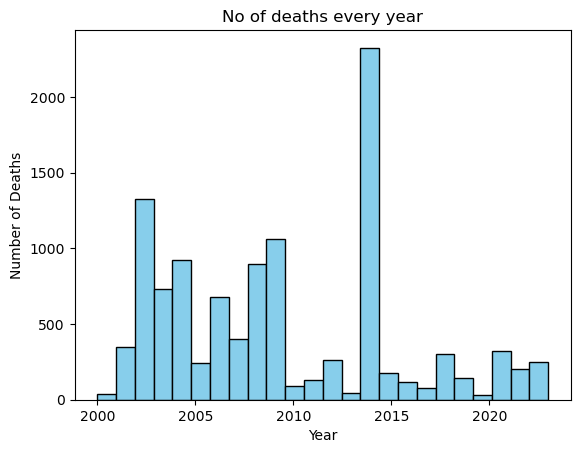

In [77]:
plt.hist(data['death_year'],bins=24, color='skyblue', edgecolor='black')

plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.title('No of deaths every year')

plt.show()

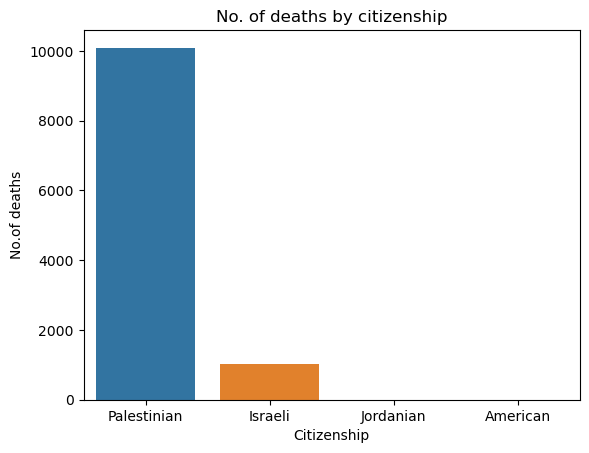

In [78]:
sns.countplot(x='citizenship',data=data)
plt.xlabel("Citizenship")
plt.ylabel("No.of deaths")
plt.title("No. of deaths by citizenship")
plt.show()

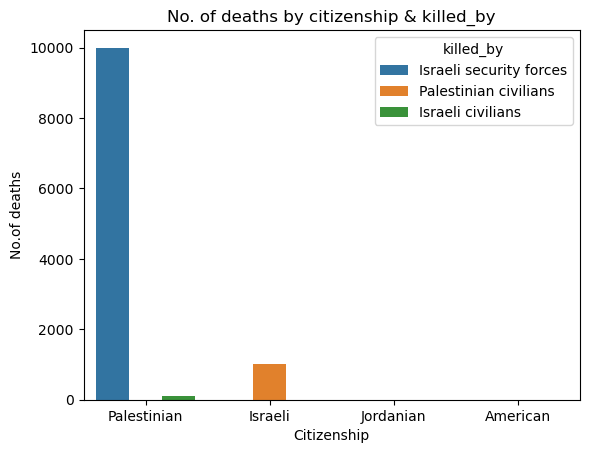

In [79]:
sns.countplot(data, x="citizenship", hue="killed_by")
plt.xlabel("Citizenship")
plt.ylabel("No.of deaths")
plt.title("No. of deaths by citizenship & killed_by")
plt.show()

Text(0.5, 1.0, '% of fatalities by gender')

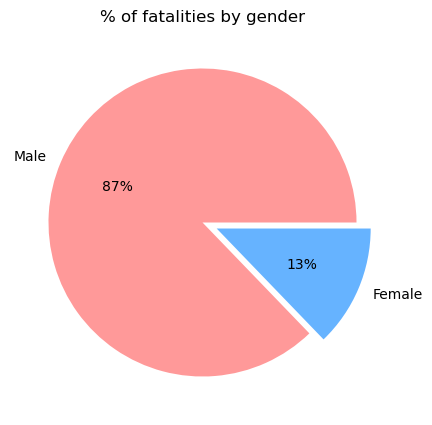

In [80]:
colors = ['#ff9999','#66b3ff']
labels=["Male","Female"]
explode=[0,0.1]
plt.figure(figsize=(5, 5))
gender_data = data['gender'].value_counts()
plt.pie(gender_data,explode=explode,labels=labels,colors=colors,autopct='%1.0f%%')
plt.title('% of fatalities by gender')

In [81]:
age_data = data['AgeGroup'].value_counts()
print(age_data)

20-30 yrs    5053
0-19 yrs     3164
31-45 yrs    1785
45-60 yrs     739
>60yrs        383
Name: AgeGroup, dtype: int64


Text(0.5, 1.0, '% of fatalities by Age Group')

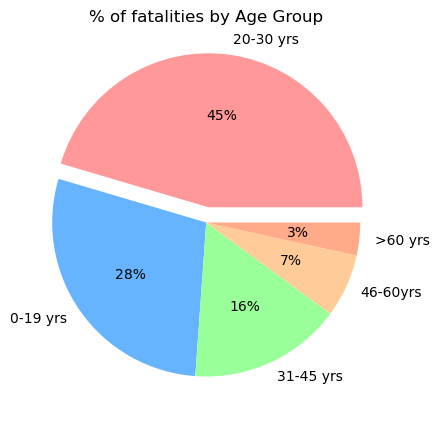

In [82]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#ffaa88']
labels=["20-30 yrs","0-19 yrs","31-45 yrs","46-60yrs",">60 yrs"]
explode=[0.1,0,0,0,0]
plt.figure(figsize=(5, 5))
age_data = data['AgeGroup'].value_counts()
plt.pie(age_data,explode=explode,labels=labels,colors=colors,autopct='%1.0f%%')
plt.title('% of fatalities by Age Group')

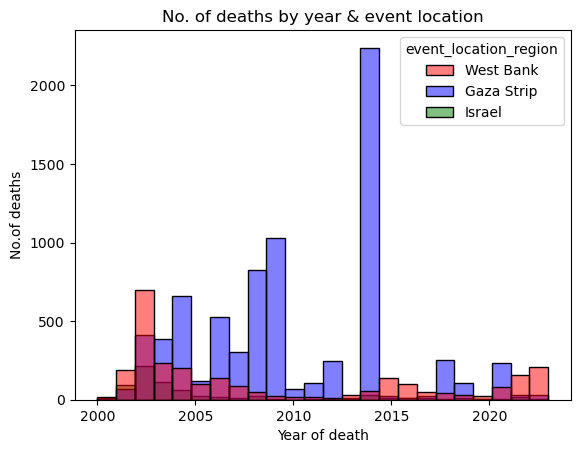

In [88]:
sns.histplot(data=data,x='death_year',bins=24,hue='event_location_region',palette=['red','blue','green'])
plt.xlabel("Year of death")
plt.ylabel("No.of deaths")
plt.title("No. of deaths by year & event location")
plt.show()

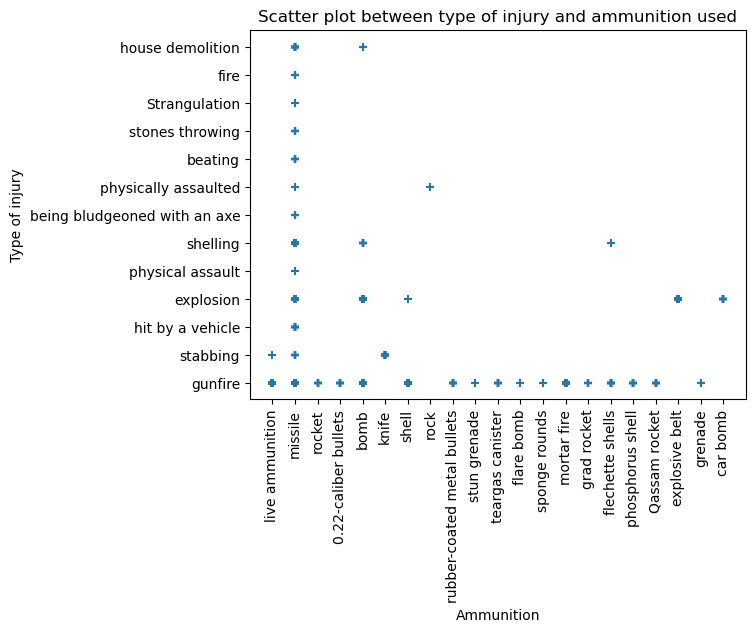

In [89]:
plt.scatter(x=data['ammunition'], y=data['type_of_injury'],marker='+')
plt.xticks(rotation=90)
plt.xlabel("Ammunition")
plt.ylabel("Type of injury")
plt.title("Scatter plot between type of injury and ammunition used")
plt.show()

# Creating categorical columns and finding Correlation

In [94]:
#Creating categorical columns

cat_cols = ['AgeGroup','citizenship', 'event_location_region','gender', 'took_part_in_the_hostilities', 
            'place_of_residence_district', 'type_of_injury', 'ammunition','killed_by']
for x in cat_cols:
    data[x+"_cat"] = pd.CategoricalIndex(data[x]).codes

<Axes: >

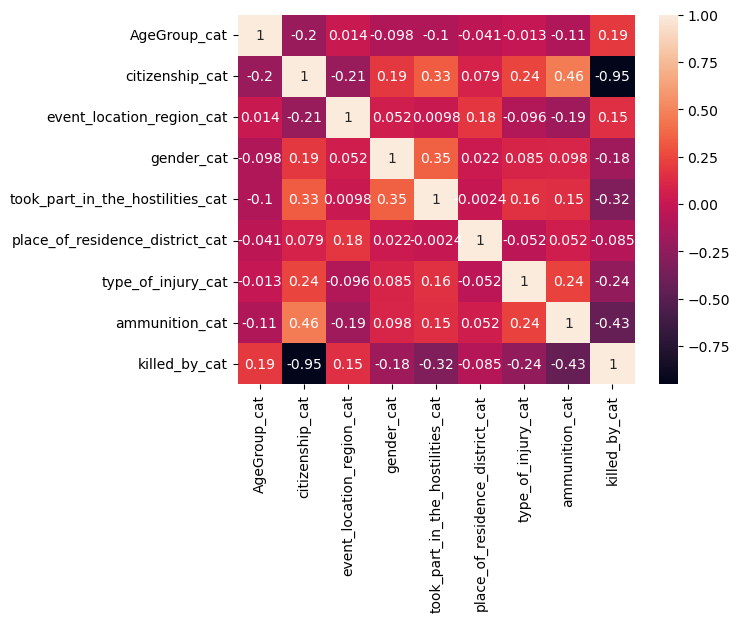

In [98]:
#Creating heatmap between the correlation of the columns

sns.heatmap(data[['AgeGroup_cat','citizenship_cat', 'event_location_region_cat','gender_cat', 'took_part_in_the_hostilities_cat', 
            'place_of_residence_district_cat', 'type_of_injury_cat', 'ammunition_cat','killed_by_cat']].corr(), annot=True)

# Conclusion

- ####  There had been a spike in the number of fatalities in the year 2014.
- ####  There have been deaths from every age from 1yr olds  to 112 yrs old, with most fatalities from the age group 20-30 yrs.
- ####  Most fatalities have been of Palestinians.
- ####  Majority of the Palestinians have been killed by Israeli Forces.
- ####  Most deaths have taken place in the Gaza strip.
- ####  Most deaths are of Males(87%).
- ####  There is high correlation between the ammunition used for killing and the citizenship of the killed.
